# 07 - Probability

## What is Probability?
Probability is a way of quantifying uncertainty. It describes the likelihood of a specific event happening within a set of possible events, ranging from 0 (impossible) to 1 (certain). Probability plays a critical role in statistics, machine learning, and decision-making processes.

We will cover:
1. **Basic concepts of probability** 
    - e.g. Experiment, Sample Space, Event

3. **Types of probability** 
    - e.g. Classical, Empirical, Subjective

2. **Operations between events**
    - e.g. Union, Intersection, Complement, Difference

4. **Bayes' Theorem**

## Basic Concepts of Probability
Let's begin with some basic terminology:

- **Experiment**: Any action that results in a well-defined outcome. 
    - **Example**: Rolling a die

- **Sample Space (S)**: The set of all possible outcomes. 
    - **Example**:  For a die, the sample space is $S = \{1, 2, 3, 4, 5, 6\}$.

- **Event (E)**: A subset of the sample space, such as getting an even number $ E = \{2, 4, 6\}$.

### Probability of an Event
The **probability** of an event $E$ happening, denoted as $P(E)$, is defined as the ratio of favorable outcomes for the event $E$ to the total number of possible outcomes in the sample space $S$.

$$P(E) = \frac{\text{Number of favorable outcomes for E}}{\text{Total number of possible outcomes in S}}$$

### Example
Let's calculate the probability of getting an even number when rolling a fair die.

- **Sample space $S = \{1, 2, 3, 4, 5, 6\}$**, so there are 6 possible outcomes.

- The **event** $E$ of rolling an even number is $E = \{2, 4, 6\}$, so there are 3 favorable outcomes

Using the formula for probability:

$$P(E) = P( \{2, 4, 6\}) = \frac{3}{6} = 0.5$$

Thus, the probability of rolling an even number is $P(E) = 0.5 = 50\%$.

#### Connecting Theory to Practice
In real-world scenarios, we often perform experiments to estimate probabilities when theoretical calculations are complex or when we want to validate the theoretical results.

We'll demonstrate this by simulating an experiment of rolling a die multiple times and estimating the probability of getting an even number. 

This allows us to compare our simulated results with the theoretical probability we just calculated.

1. **Rolling the Die**:

    - We'll walk through simulating the roll of a die 1000 times and calculate the probability of rolling an even number.

    - We define a function `roll_die()` that simulates rolling a 6-sided die using Python's `random.randint()` function.

In [1]:
import random

# Simulate rolling a die
def roll_die():
    return random.randint(1, 6)

This function returns a random number between 1 and 6.

In [2]:
# Example usage
roll_die()

1

2. **Simulating 1000 Rolls**:

    - We simulate rolling the die 1000 times and keep track of how many times we roll an even number (2, 4, or 6).

In [3]:
# Number of simulations
n_simulations = 1000
even_count = 0
all_rolls = []

# Simulate rolling a die 1000 times
for i in range(n_simulations):
    # Roll the die
    roll = roll_die()
    # print(f"Simulation #{i+1}, Number Rolled: {roll}")

    # Add roll to list `all_rolls`
    all_rolls.append(roll)

    # Increment `even_count` if the roll is even
    if roll % 2 == 0:
        even_count += 1

3. **Calculating Probability**:

    - After the simulation, we estimate the probability of rolling an even number by dividing the number of even rolls by the total number of simulations (1000 in this case).

In [4]:
print(f"Total simulation: {n_simulations}")
print(f"Count of even rolls: {even_count}")

# Probability of getting an even number
prob_even = even_count / n_simulations
print(f"Estimated Probability of getting an even number = {even_count}/{n_simulations} =  {prob_even:.4f} = {prob_even*100:.2f}%")

Total simulation: 1000
Count of even rolls: 513
Estimated Probability of getting an even number = 513/1000 =  0.5130 = 51.30%


4. **Visualization**:

    - We can create a bar chart showing the distribution of even and odd rolls from the simulation, helping us visually interpret the frequency of each outcome.

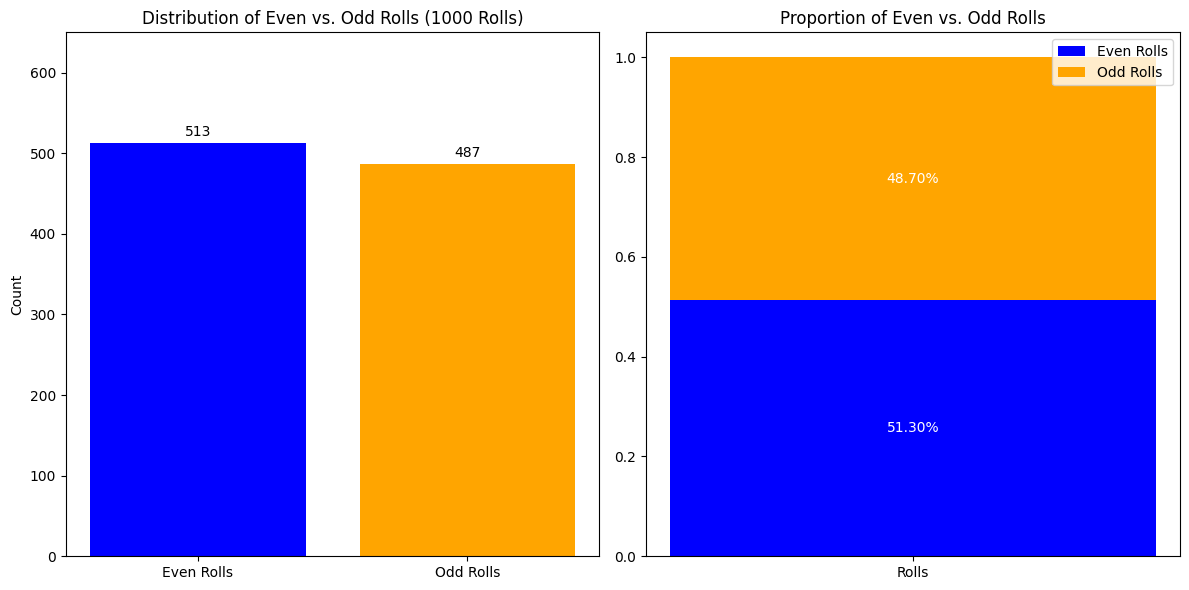

In [5]:
import matplotlib.pyplot as plt

# Visualization: Distribution of rolls (odd vs. even)

# Data for the plots
odd_count = n_simulations - even_count
prob_odd = 1 - prob_even
labels = ['Even Rolls', 'Odd Rolls']
counts = [even_count, odd_count]

# Set up subplots: 1 row, 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# First subplot: Simple bar chart with counts
axes[0].set_ylim(0, 650)
axes[0].bar(labels, counts, color=['blue', 'orange'])
axes[0].set_ylabel('Count')
axes[0].set_title('Distribution of Even vs. Odd Rolls (1000 Rolls)')

# Add count annotations on top of the bars
for i, count in enumerate(counts):
    axes[0].text(i, count + 5, str(count), ha='center', va='bottom')

# Second subplot: Stacked bar chart showing proportions
# For stacking, we need to use two bars with a sum of 1
axes[1].bar('Rolls', prob_even, color='blue', label='Even Rolls')
axes[1].bar('Rolls', prob_odd, bottom=prob_even, color='orange', label='Odd Rolls')

# Add proportion annotations inside the stacked bars
axes[1].text(0, prob_even / 2, f'{prob_even:.2%}', ha='center', va='center', color='white')
axes[1].text(0, prob_even + prob_odd / 2, f'{prob_odd:.2%}', ha='center', va='center', color='white')

axes[1].set_title('Proportion of Even vs. Odd Rolls')
axes[1].legend()

# Adjust layout
plt.tight_layout()
plt.show()


## Law of Large Numbers
- **Law of Large Numbers**: as the number of simulations increases, the estimated probability will get closer to the theoretical probability

    - **Example**: The more times you roll a die, the closer the observed frequency of rolling an even number will get to the theoretical probability of $0.5$.

### Theoretical Explanation
If we roll a die a small number of times, we may see significant variations in the results—sometimes **more** even numbers, sometimes **fewer**. 

However, as the number of rolls increases, the proportion of even numbers will get **closer** to 50%, which is the theoretical probability of rolling an even number.

### Example
Let's simulate rolling a die repeatedly and track how the estimated probability of rolling an even number **converges** toward the theoretical probability of $0.5$ as we increase the number of rolls.

#### Python Simulation
We can extend our previous code to simulate rolling the die a large number of times and observe how the estimated probability evolves with each roll.

In [6]:
# Number of simulations
n_simulations = 10000
even_count = 0
probabilities = []  # List to store probabilities after each roll

# Simulate rolling a die `n_simulations` times
for i in range(n_simulations):
    # Roll the die
    roll = roll_die()
    
    # Increment `even_count` if the roll is even
    if roll % 2 == 0:
        even_count += 1

    # Calculate and store the estimated probability after each roll
    est_probability = even_count / (i + 1)
    probabilities.append(est_probability)

    # print(f"Estimated Probability after {i + 1} rolls: {est_probability:.4f}")

#### Visualization: Convergence to Theoretical Probability
To visually demonstrate how the estimated probability converges toward the theoretical probability, we can plot the probability after each roll.

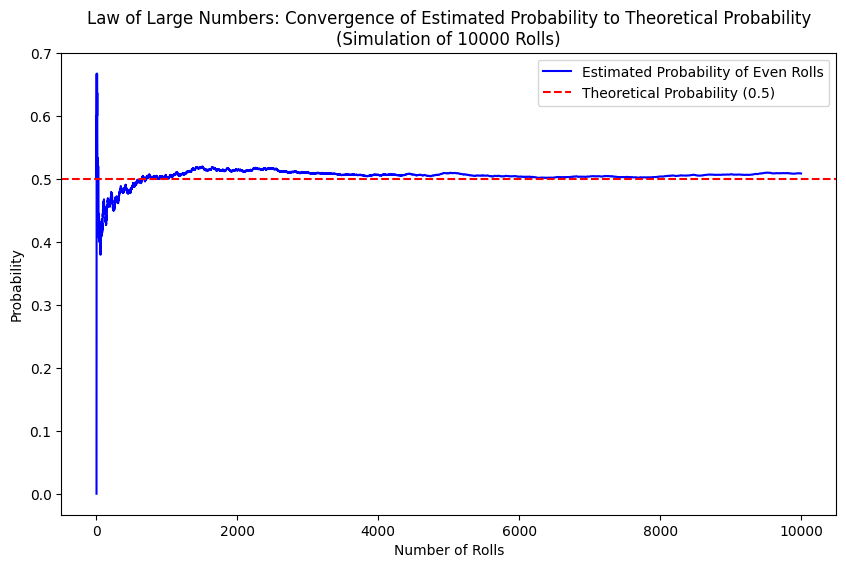

In [7]:
# Visualization: Law of Large Numbers
# X-axis: Number of rolls (1, 2, 3, ..., n_simulations)
x = range(1, n_simulations + 1)

# Plot empirical probabilities over time
plt.figure(figsize=(10, 6))
plt.plot(x, probabilities, label='Estimated Probability of Even Rolls', color='blue')

# Add a horizontal line for the theoretical probability
plt.axhline(y=0.5, color='red', linestyle='--', label='Theoretical Probability (0.5)')

# Add labels and title
plt.title(f'Law of Large Numbers: Convergence of Estimated Probability to Theoretical Probability\n(Simulation of {n_simulations} Rolls)')
plt.xlabel('Number of Rolls')
plt.ylabel('Probability')
plt.legend()

# Show plot
plt.show()


## Types of probability
Probability can be understood and classified in various ways, depending on how the likelihood of events is measured or interpreted. Let's explore a few types.

### 1. Classical Probability
Also known as "theoretical probability," classical probability assumes that all outcomes in a sample space are equally likely. 

It's the kind of probability we calculate when we have well-defined rules, like rolling a die or flipping a coin.

- **Formula**:

$$P(E) = \frac{\text{Number of favorable outcomes}}{\text{Total number of possible outcomes}}$$

- **Example**:

    - **Experiment**: Rolling a fair six-sided die.

    - **Sample Space**: $S = \{1, 2, 3, 4, 5, 6\}$

    - **Event**: Getting an even number, $E = \{2, 4, 6\}$.

    - **Classical Probability**: $P(E) = \frac{3}{6} = 0.5 = 50\%$.

- **Key Insight**: Classical probability is based on equally likely outcomes.

### 2. Empirical Probability
Also called "estimated probability," empirical probability is based on observations or experiments.

Rather than assuming equal likelihood, we calculate probability from actual data.

- **Formula**:

$$P(E) = \frac{\text{Number of times event E occurred}}{\text{Total number of trials}}$$

- **Example**:

    - **Experiment**: Rolling a die 100 times and recording the outcomes.

    - **Observation**: Suppose we rolled an even number 48 times.

    - **Empirical Probability**: $P(E) = \frac{48}{100} = 0.48 = 48\%$.

- **Key Insight**: Empirical probability is data-driven and may differ from theoretical probability, especially with fewer trials.

### 3. Subjective Probability
Subjective probability is based on personal judgment, beliefs, or experience rather than formal calculations or data. 

It’s often used in situations where past data or precise calculations aren’t available.

- **Example**:

    - **Scenario**: A doctor estimates there’s a 60% chance of a patient recovering based on their experience and medical knowledge.

    - **Interpretation**: This probability is subjective because it’s based on the doctor's judgment rather than hard data.

- **Key Insight**: Subjective probability varies between individuals and situations. It reflects personal belief or intuition.

## Operations of events
In probability, events are sets of outcomes from a sample space. We can perform different operations on these sets to analyze how events interact. 

The four key operations we’ll explore are **Union**, **Intersection**, **Complement**, and **Difference**.

### 1. Union of Events (OR)
The union of two events represents the event that occurs if at least one of the events occurs. In set notation, the union of two events.

In set notation, the union of two events $A$ and $B$ is written as $A \cup B$, which reads as "A or B."

<p align="center">
  <img src="imgs/probability1.png" alt="Alt text">
</p>

- **Formula**:

$$P(A \cup B) = P(A) + P(B) - P(A \cap B)$$

The term $P(A \cap B)$ is subtracted to avoid double-counting the overlap between events $A$ and $B$.

- **Example**:

  - **Scenario**: You roll a die. Let:

    - Event $A = $ rolling an even number $= \{2, 4, 6\}$

    - Event $B = $ rolling a number greater than 4 $= \{5, 6\}$

    - Events $A$ **AND** $B =$ rolling an even number **AND** rolling a number greater than 4 $= \{6\}$

  - **Probability**:

    $$P(A \cup B) =$$

    $$P(\text{rolling an even number OR rolling a number greater than 4}) =$$

    $$P(A) + P(B) - P(A \cap B) =$$

    $$\frac{3}{6} + \frac{2}{6} - \frac{1}{6} =$$

    $$\frac{4}{6} = 0.67 = 67\%$$

- **Key Insight**: Union captures the probability of either event happening.

#### Union of Events (OR) Simulation
In this simulation, we'll calculate the union of the two events from the previous example and the associated probability.

In [8]:
# Variables to track the count of events
A_count = 0
B_count = 0
A_and_B_count = 0
A_or_B_count = 0

# Number of simulations
n_simulations = 100

# Simulate rolling the die for n_simulations
for i in range(n_simulations):
    # Roll the die
    roll = roll_die()
    
    # Increment `A_count` if the roll is even
    if roll % 2 == 0:
        A_count += 1

    # Increment `B_count` if the roll is greater than 4
    if roll > 4:
        B_count +=1

    # Increment `A_and_B_count` if the roll is even AND greater than 4
    if (roll % 2 == 0) and (roll > 4):
        A_and_B_count +=1

    # Increment `A_or_B_count` if the roll is even OR greater than 4
    if (roll % 2 == 0) or (roll > 4):
        A_or_B_count +=1

prob_A = A_count / n_simulations
prob_B = B_count / n_simulations
prob_A_and_B = A_and_B_count / n_simulations

prob_A_or_B = prob_A + prob_B - prob_A_and_B
# prob_A_or_B = A_or_B_count / n_simulations

# print(f"Total simulations: {n_simulations}")
# print(f"Count of union events (A ∪ B): {A_or_B_count}")
print(f"P(A ∪ B) = {prob_A_or_B:.2f} = {prob_A_or_B*100:.2f}%")

P(A ∪ B) = 0.64 = 64.00%


### 2. Intersection of Events (AND)
The intersection of two events represents the event where both events occur simultaneously. 

It is written as $A \cap B$, which reads as "A and B."

<p align="center">
  <img src="imgs/probability2.png" alt="Alt text">
</p>

- **Formula**:

$$P(A \cap B)$$

This is simply the probability of both $A$ and $B$ happening at the same time.


- **Example**:

    - **Scenario**: Using the same die roll example:

      - Event $A =$ rolling an even number $= \{2, 4, 6\}$ 

      - Event $B =$ rolling a number greater than 4 $= \{5, 6\}$ 

    - **Intersection** $A \cap B$: Rolling a number that is both even and greater than 4:

    $$A \cap B = \{6\}$$

    - **Probability**:

    $$P(A \cap B) = \frac{1}{6} = 0.17 = 17\%$$

- **Key Insight**: Intersection captures the likelihood of both events happening at the same time.

#### Intersection of Events (AND) Simulation
For the intersection, we will calculate the event where both $A$ and $B$ happen simultaneously.

In [9]:
# Variables to track the count of events
A_and_B_count = 0

# Number of simulations
n_simulations = 100

# Simulate rolling the die for n_simulations
for i in range(n_simulations):
    # Roll the die
    roll = roll_die()
    
    # Increment `A_and_B_count` if the roll is even AND greater than 4
    if (roll % 2 == 0) and (roll > 4):
        A_and_B_count +=1

prob_A_and_B = A_and_B_count / n_simulations

print(f"Total simulations: {n_simulations}")
print(f"Count of intersection events (A ∩ B): {A_and_B_count}")
print(f"P(A ∩ B) = {A_and_B_count}/{n_simulations} = {prob_A_and_B:.2f} = {prob_A_and_B*100:.2f}%")

Total simulations: 100
Count of intersection events (A ∩ B): 14
P(A ∩ B) = 14/100 = 0.14 = 14.00%


### 3. Complement of an Event (NOT)
The **complement** of an event represents the probability that the event **does not occur**.

The complement of event $A$ is written as $A^c$, and it includes all outcomes that are **not** part of $A$.

<p align="center">
  <img src="imgs/probability3.png" alt="Alt text">
</p>

- **Formula**:

$$P(A^c) = 1 - P(A)$$

- **Example**:

  - **Scenario**: Let event $A =$ rolling an even number $= \{2, 4, 6\}$ on a die.

  - **Complement** $A^c =$ rolling a number that is not even $= \{1, 3, 5\}$ 

  - **Probability**:

  $$P(A^c) = 1 - P(A) = 1 - \frac{3}{6} = 0.5 = 50\%$$

- **Key Insight**: The complement represents all the outcomes not included in the event.

#### Complement of an Event (NOT) Simulation
We'll calculate the complement of event $A$, ehich represents the event that $A$ does not occur.

In [10]:
# Variables to track the count of events
A_count = 0
A_c_count = 0

# Number of simulations
n_simulations = 100

# Simulate rolling the die for n_simulations
for i in range(n_simulations):
    # Roll the die
    roll = roll_die()
    
    # Increment `A_count` if the roll is even
    if roll % 2 == 0:
        A_count += 1

    # Increment `A_c_count` if the roll is even
    if roll % 2 != 0:
        A_c_count += 1

prob_A = A_count / n_simulations

prob_A_c = 1 - prob_A
# prob_A_c = A_c_count / n_simulations

# print(f"Total simulations: {n_simulations}")
# print(f"Count of A^c: {A_c_count}")
print(f"P(A^c) = {prob_A_c:.2f} = {prob_A_c*100:.2f}%")

P(A^c) = 0.49 = 49.00%


### 4. Difference of Events (A but not B)
The difference between two events $A$ and $B$ represents the outcomes that are in $A$ but **not in** $B$.

It’s written as $A - B$, and reads as "A but not B."

<p align="center">
  <img src="imgs/probability4.png" alt="Alt text">
</p>

- **Formula**:

$$P(A - B) = P(A) - P(A \cap B)$$

This removes the overlap between $A$ and $B$ from the probability of $A$.

- **Example**: 

  - **Scenario**: Using the same die roll example:

    - Event $A =$ rolling an even number $= \{2, 4, 6\}$

    - Event $B =$ rolling a number greater than 4 $= \{5, 6\}$

  - **Difference** $A - B =$ rolling an even number that is not greater than 4 $= \{2, 4\}$

  - **Probability**:

  $$P(A - B) = \frac{2}{6} = 0.33 = 33\%$$

- **Key Insight**: Difference shows what remains of event $A$ after excluding the overlap with event $B$.

#### Difference of Events Simulation
Finally, we’ll simulate the difference $A - B$, which represents the event where $A$ occurs but $B$ does not.

In [13]:
# Variables to track the count of events
A_count = 0
A_and_B_count = 0
A_not_B_count = 0

# Number of simulations
n_simulations = 100

# Simulate rolling the die for n_simulations
for i in range(n_simulations):
    # Roll the die
    roll = roll_die()
    
    # Increment `A_count` if the roll is even
    if roll % 2 == 0:
        A_count += 1

    # Increment `A_and_B_count` if the roll is even AND greater than 4
    if (roll % 2 == 0) and (roll > 4):
        A_and_B_count +=1

    # Increment `A_not_B_count` if the roll is even but not greater than 4
    if (roll % 2 == 0) and not (roll > 4):
        A_not_B_count +=1

prob_A = A_count / n_simulations
prob_A_and_B = A_and_B_count / n_simulations

prob_A_not_B = prob_A - prob_A_and_B
# prob_A_not_B = A_not_B_count / n_simulations

# print(f"Total simulations: {n_simulations}")
# print(f"Count of A - B: {A_not_B_count}")
print(f"P(A - B) = {prob_A_not_B:.2f} = {prob_A_not_B*100:.2f}%")

P(A - B) = 0.31 = 31.00%


## Bayes' Theorem
**Bayes' Theorem** is used to update the probability of an event based on new information. 

It allows us to revise our initial beliefs (called **prior probabilities**) in light of new data or information.

### The Formula
Bayes' Theorem states:

$$P(A|B) = \frac{P(B|A) \times P(A)}{P(B)}$$

Where:

- $P(A|B)$ is the ***posterior probability***: the probability of event $A$ happening given that $B$ hass occurred.

- $P(B|A)$ is the **likelihood**: the probability of event $B$ happening given that $A$ has occurred.

- $P(A)$ is the **prior probability**: The initial probability of event $A$.

- $P(B)$ is the **marginal probability**: the total probability of event $B$ occurring.

### Understanding Bayes' Theorem
In simpler terms, Bayes' Theorem helps answer: “Given that something has happened (event $B$), how likely is it that some underlying cause $A$ was responsible for it?"

### Example
[IN PROGRESS]

## Conclusion
In this lesson, we covered the basics of probability, including key concepts like experiments, events, and calculating probabilities. We explored operations between events and introduced Bayes' Theorem to show how new information can affect probabilities. Through Python simulations, we connected theory to practice.

## Additional Resources
- (Introduction to Probability - MIT OCW)[https://ocw.mit.edu/courses/18-05-introduction-to-probability-and-statistics-spring-2022/]

- (Khan Academy - Probability and Statistics)[https://www.khanacademy.org/math/statistics-probability]

- (Coursera: Probability and Statistics)[https://www.coursera.org/courses?query=probability%20and%20statistics]